### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 1. Graphs and Graph Theory

# Lecture 4: Bipartite Graphs and Projections

We'll look at further properties of graphs and networks, both from a theoretical point of views and 
from the practical side of handling graphs in the `NetworkX` environment.  Start by importing the necessary
`python` libraries into this `jupyter` notebook.

In [1]:
import networkx as nx
import numpy as np

Provide a sample graph, as before.

In [2]:
G = nx.Graph(["AB", "BC", "BD", "CD", "CE", "DE"])
opts = { "with_labels": True, "node_color": 'y' }
nx.draw(G, **opts)

## Composition and Adjacency Matrices.

* Relations can be composed, like functions.  

* If $R$ is a relation
from a set $X$ to a set $Y$, and if $S$ is a relation from $Y$ to a set $Z$,
then the __composite relation__ $R \circ S$ is the relation
from $X$ to $Z$, defined by $x (R \circ S) z$ if there is a
an element $y \in Y$ such that $x R y$ and $y S z$.

* The adjacency matrix of the composite relation $R \circ S$
is essentially the (matrix) product of the adjacency matrices
of the individual relations $R$ and $S$.

* If $A = (a_{ij})$ is the adjacency matrix of $R$, and $B = (b_{jk})$ the adjacency matrix of $S$,
then the $i,k$-entry of the product $AB$ is
$$(AB)_{ik} = \sum_{j} a_{ij} b_{jk},$$
which is exactly the __number__ of elements $y \in Y$ such that $x_i R
y$ and $y S z_k$.  

* All it needs for $x_i$ to be $(R \circ S)$-related
to $z_k$ is this number to be at least $1$.  

* Hence, replacing all
nonzero entries in the product matrix $AB$ with $1$ yields the
adjacency matrix of the composite $R \circ S$.

* Note that, if $R$ is a relation from $X$ to $Y$
then the **opposite** Relation $R^{\mathrm{op}} = \{(y, x) :  xRy\}$
is a relation from $Y$ to $X$.

* The adjacency matrix of $R^{\mathrm{op}}$ is the **transpose** $A^T$
  of the adjacency matrix $A$ of $R$.

* Hence $R \circ R^{\mathrm{op}}$ is a relation **on** $X$ (with adjacency matrix $A A^{T}$)
  and $R^T \circ R$ is a relation **on** $Y$ (with adjacency matrix $A^T A$).

* Recall that a graph $G$ on a vertex set $X$ is the same as a symmetric intransitive
  relation $R$  on the set $X$.

* We can form the matrix product of the adjacency matrix $A$ of $G$ (or $R$) with itself.
  What is the **meaning** of the entries of that product?

In [3]:
A = nx.adjacency_matrix(G).todense()
AA = A * A
print(AA)

[[1 0 1 1 0]
 [0 3 1 1 2]
 [1 1 3 2 1]
 [1 1 2 3 1]
 [0 2 1 1 2]]


In `numpy`, one can use **boolean indexing** and other convenient methods to convert $A^2$
into an adjacency matrix of a graph.

In [4]:
AA[AA>1] = 1
print(AA)

[[1 0 1 1 0]
 [0 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 1 1 1 1]]


In [5]:
np.fill_diagonal(AA, 0)
print(AA)

[[0 0 1 1 0]
 [0 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [0 1 1 1 0]]


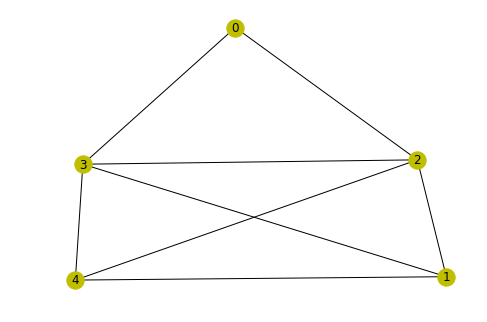

In [6]:
GG = nx.from_numpy_matrix(AA)
nx.draw(GG, **opts)

* Oops - The node names got lost.  They can be revived by relabelling the nodes in `GG`.

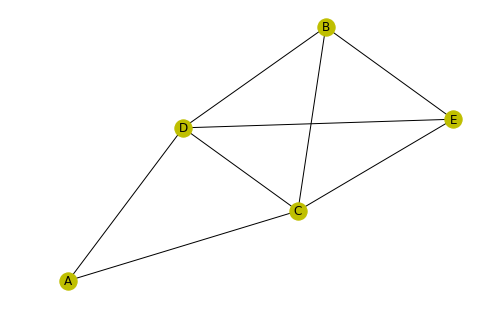

In [7]:
nx.relabel_nodes(GG, { i : "ABCDE"[i] for i in range(5)}, copy=False)
nx.draw(GG, **opts)

### Bipartite Graphs

<div class="alert alert-warning">
    A (simple) graph $G = (X, E)$ is called <b>bipartite</b>, if the vertex set $X$ is a disjoint union
of two sets $B$ (of black nodes) and $W$ (of white nodes) so that each edge in $E$ links a
black vertex with a white vertex.
    </div>

Here is a sample bipartite graph $B$, specified to the `Graph` constructor by its edge list.

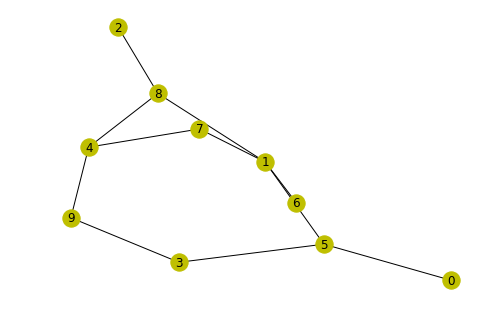

In [8]:
edges = [(0,5), (1,5), (1,6), (1,7), (1,8), 
  (2,8), (3,5), (3,9), (4,7), (4,8), (4,9)]
B = nx.Graph(edges)
nx.draw(B, **opts)

In this graph, the **white** nodes can be taken  as the set $W = \{0,1,2,\dots,4\}$ 
and the **black** nodes as $B = \{5,6,\dots,9\}$.
The drawing command `nx.draw` takes as optional argument a dictionary `pos` that specifies for
each node a (relative) position in the drawing.  Here, the node is the key and the 
position is a pair of $x$,$y$-coordinates.  In this example we can use the (integer) quotient
and remainder, as returned by the python method `divmod` to quickly compute a dictionary of positions
that have the white nodes on the left, and the black nodes on the right.

In [9]:
divmod(7, 5)

(1, 2)

In [10]:
pos = {x: divmod(x, 5) for x in range(10)}
pos

{0: (0, 0),
 1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (0, 4),
 5: (1, 0),
 6: (1, 1),
 7: (1, 2),
 8: (1, 3),
 9: (1, 4)}

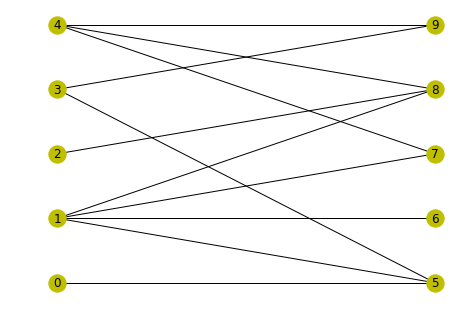

In [11]:
nx.draw(B, pos, **opts)

Node colors can be specified as a *list* assigned to the keyword argument `node_color`.  We can use the $x$-coordinates of the node positions for that purpose.

In [12]:
color = [pos[x][0] for x in B.nodes()]
color

[0, 1, 0, 1, 1, 1, 0, 0, 1, 0]

In [13]:
print(B.nodes)

[0, 5, 1, 6, 7, 8, 2, 3, 9, 4]


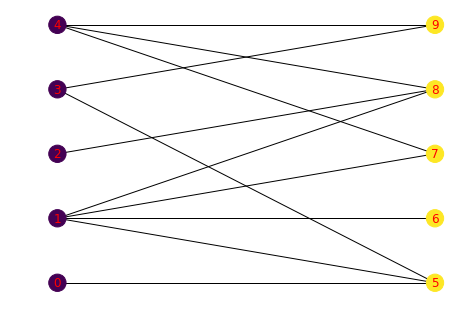

In [14]:
nx.draw(B, pos, with_labels=True, node_color=color, font_color='r')

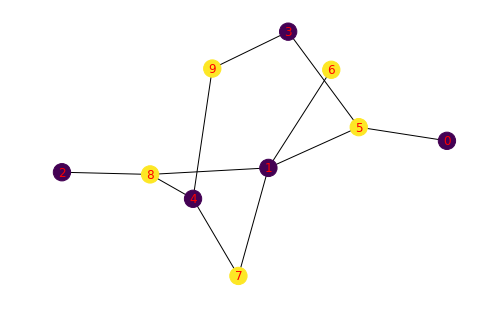

In [15]:
nx.draw(B, with_labels=True, node_color=color, font_color='r')

A **(vertex)-coloring** of a graph $G$ is an assignment of (finitely many) colors to the nodes of $G$,
so that any two nodes which are connected by an edge have *different* colors.

A graph is called **$N$-colorable**, if it has a vertex coloring with (at most) $N$ colors.

<div class="alert alert-danger">
    <b>Theorem.</b> Let $G$ be a graph.  The following are equivalent:
<ul>
    <li>$G$ is bipartite;</li>
    <li>$G$ is $2$-colorable;</li>
    <li>each cycle in $G$ has even length.</li>
</ul>
    (See below for <b>cycle</b> and <b>length</b>)
</div>

2D grids are naturally bipartite:

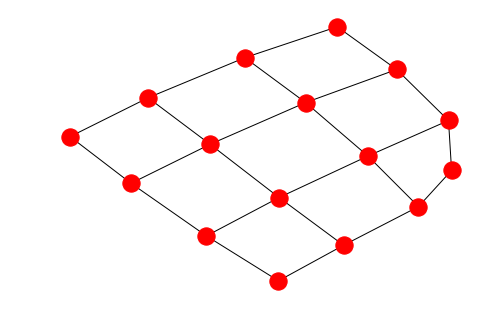

In [16]:
G44 = nx.grid_2d_graph(4, 4)
nx.draw(G44)

The method `nx.bipartite.color` determines a $2$-coloring of a graph $G$ algorithmically, if it exists, i.e. if
$G$ is bipartite.

In [17]:
color = nx.bipartite.color(G44)
color

{(0, 0): 1,
 (1, 0): 0,
 (0, 1): 0,
 (1, 1): 1,
 (0, 2): 1,
 (1, 2): 0,
 (0, 3): 0,
 (1, 3): 1,
 (2, 3): 0,
 (3, 3): 1,
 (2, 2): 1,
 (3, 2): 0,
 (2, 1): 0,
 (3, 1): 1,
 (2, 0): 1,
 (3, 0): 0}

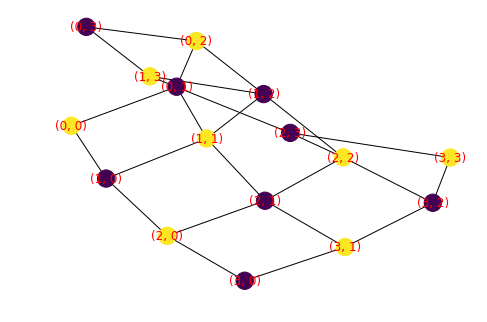

In [18]:
color = [color[x] for x in G44.nodes()]
nx.draw(G44, with_labels=True, node_color=color, font_color='r')

### Affiliation Networks and Projections

Bipartite graphs arise in practice as models for **affiliation networks**.
In such a network, the *black* nodes are people, and the *white* nodes are attributes 
of the people, such as common interests (books bought online), workplaces, social events attended ...
Edges in such network connect people with their attributes.

A frequently cited example form the sociology literature (Davis, A., Gardner, B., and 
Gardner, R. 1941. 
Deep South.
Chicago: University of Chicago Press.) is the **Southern Women Network**.
This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recorded which women met for which events.

<img src="https://www.researchgate.net/profile/Linton_Freeman/publication/246188409/figure/fig1/AS:298262658600961@1448122767704/Participation-of-the-Southern-Women-in-Events.png">

The resulting bipartite graph on the vertex set consisting of the 18 woman and the 14 events is readily available in `NetworkX`.

In [19]:
G = nx.generators.social.davis_southern_women_graph()
list(G.nodes())

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

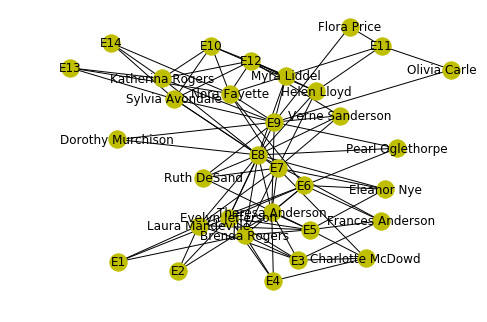

In [20]:
nx.draw(G, **opts)

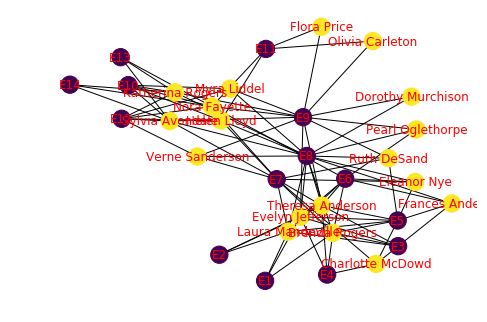

In [21]:
color = nx.bipartite.color(G)
color = [color[x] for x in G.nodes()]
nx.draw(G, with_labels=True, node_color=color, font_color='r')

**Note.** The adjacency matrix $A$ of a bipartite graph $G$, with respect to a suitable ordering of the vertices
($B$ first, then $W$), has the form of a $2 \times 2$-block matrix,
$$
  A = \left( \begin{array}{cc} 0 & C \\ C^T & 0 \end{array} \right)
$$
where the blocks on the diagonal consist entirely of zeros, as there are no edges between vertices of the same color, and the lower left block is the **transpose** $C^T$ of the matrix $C$ of entries in the upper right. 

In [22]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
with np.printoptions(threshold=9999):
    print(A.todense())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 

In `NetworkX`, all parts of a graph can have **attributes**: the nodes, 
the edges, and the graph object itself.  Graph object attributes of a graph `G` are stored in the field `G.graph`.  By convention, the two
underlying sets of a bipartite graph are stored here as attributes
called `'top'` and `'bottom'`.

In [24]:
X, Y = G.graph['top'], G.graph['bottom']
C = nx.bipartite.biadjacency_matrix(G, X, Y)
print(C.todense())

[[1 1 1 1 1 1 0 1 1 0 0 0 0 0]
 [1 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]]


As $A = A^T$, we get
\\[
A^T \cdot A = A \cdot A^T = A \cdot A = 
\left(
\begin{array}{cc}
C \cdot C^T & 0 \\ 0 & C^T \cdot C
\end{array}
\right)
\\]
where $C \cdot C^T$ is the adjacency matrix of the **projection** onto the vertex set $B$,
and $C^T \cdot C$is the adjacency matrix of the **projection** onto the vertex set $W$.

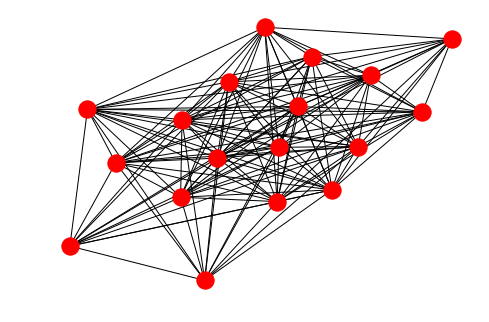

In [25]:
BB = nx.from_numpy_matrix((C*C.transpose()).todense())
nx.draw(BB)

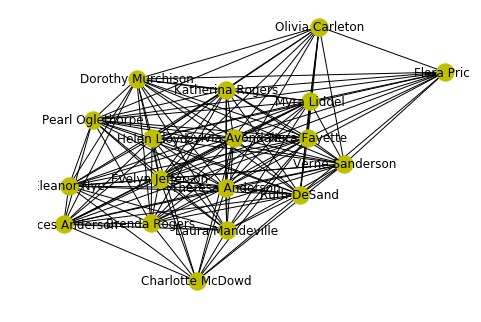

In [26]:
nodes = G.graph['top']
mapping = {i: nodes[i] for i in range(len(nodes))}
nx.relabel_nodes(BB, mapping, False)
nx.draw(BB, **opts)

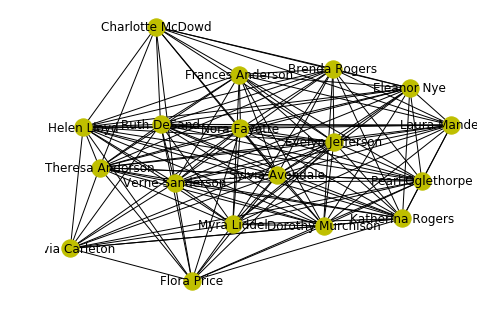

In [27]:
BBB = nx.bipartite.projected_graph(G, G.graph['top'])
nx.draw(BBB, **opts)

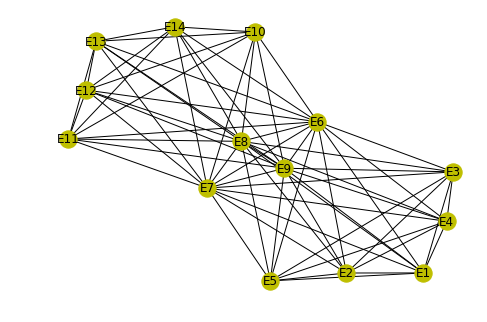

In [28]:
WWW = nx.bipartite.projected_graph(G, G.graph['bottom'])
nx.draw(WWW, **opts)

In [29]:
print((C*C.transpose()).todense())

[[8 6 7 6 3 4 3 3 3 2 2 2 2 2 1 2 1 1]
 [6 7 6 6 3 4 4 2 3 2 1 1 2 2 2 1 0 0]
 [7 6 8 6 4 4 4 3 4 3 2 2 3 3 2 2 1 1]
 [6 6 6 7 4 4 4 2 3 2 1 1 2 2 2 1 0 0]
 [3 3 4 4 4 2 2 0 2 1 0 0 1 1 1 0 0 0]
 [4 4 4 4 2 4 3 2 2 1 1 1 1 1 1 1 0 0]
 [3 4 4 4 2 3 4 2 3 2 1 1 2 2 2 1 0 0]
 [3 2 3 2 0 2 2 3 2 2 2 2 2 2 1 2 1 1]
 [3 3 4 3 2 2 3 2 4 3 2 2 3 2 2 2 1 1]
 [2 2 3 2 1 1 2 2 3 4 3 3 4 3 3 2 1 1]
 [2 1 2 1 0 1 1 2 2 3 4 4 4 3 3 2 1 1]
 [2 1 2 1 0 1 1 2 2 3 4 6 6 5 3 2 1 1]
 [2 2 3 2 1 1 2 2 3 4 4 6 7 6 4 2 1 1]
 [2 2 3 2 1 1 2 2 2 3 3 5 6 8 4 1 2 2]
 [1 2 2 2 1 1 2 1 2 3 3 3 4 4 5 1 1 1]
 [2 1 2 1 0 1 1 2 2 2 2 2 2 1 1 2 1 1]
 [1 0 1 0 0 0 0 1 1 1 1 1 1 2 1 1 2 2]
 [1 0 1 0 0 0 0 1 1 1 1 1 1 2 1 1 2 2]]


##  Code Corner

### `Numpy`

### `networkx`

* `relabel_nodes`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.relabel.relabel_nodes.html#networkx.relabel.relabel_nodes)

## Exercises

1. Compute the adjacency matrix of the bipartite graph $B$ at the top 
of this page and verify its block structure.

1. Compute the biadjacency matrix $C$ of the graph $B$.

1. Compute the two products of $C$ and its transpose,
and, using the products as adjacency matrix, construct two graphs
from them.

1. Compute the two projections of the bipartite graph $B$ and
compare them with the graphs constructed in the previous exercise.